# ECommerce Product Price Analysis

Objective: To predict the sales price of a product based on various features
Dataset: Scraped from Shopee
Product: Shin Ramen

## Import Libraries & Dataset

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('raw_shin ramen_shopee.csv')

# Show rows and columns
print(df.shape)

(500, 13)


In [3]:
df.head()

,prod_name,prod_desc,prod_price,prod_rating,prod_no_rating,prod_no_sold,sell_name,sell_rating,sell_no_products,sell_resprate,sell_resptime,sell_follower,sell_joined
0,Preferred+\n【Ready Stock 】 [Halal] NongShim Sh...,NaN,RM12.50,5.0,5.0,421,49shopp,23.5k,411,98%,within hours,3 years ago,9.8k
1,Halal Nongshim Ramen (Shin Ramyun / Kimchi Ram...,Expiry date :\nShin ramyun - December 2021\nKi...,RM15.90 - RM48.00,4.9,4.9,68,newlineresources.online,2.1k,57,81%,within hours,12 months ago,1.2k
2,Halal Nongshim Shin Ramyun/Kimchi Ramen/ neogu...,"As part of the marketing strategies, Nongshim ...",RM63.50,NaN,0.0,0,newlineresources.online,2.1k,57,81%,within hours,12 months ago,1.2k
3,Preferred+\nSHIN • KOREA KOREAN RAMEN POT ○ YE...,**Get Korean Spoon & Chopsticks at Only RM10 w...,RM13.80 - RM69.80,4.9,4.9,788,imshin.,25.2k,421,99%,within hours,5 years ago,25.4k
4,Preferred+\n【Ready Stock】 (HALAL) Korea Nongsh...,1. Nongshim Shin Ramyun Bowl (117g)\n- Octobe...,RM4.50,5.0,5.0,967,49shopp,23.5k,411,98%,within hours,3 years ago,9.8k


## Data Cleaning

In [4]:
# Make a list of features which has missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

# Print the feature name and percentage of missing values
for feature in features_with_na: 
    print(feature,np.round(df[feature].isnull().mean(),4), '% missing values')

prod_desc 0.004 % missing values
prod_rating 0.71 % missing values


In [5]:
# Find out the data types of each columns
df.dtypes

prod_name            object
prod_desc            object
prod_price           object
prod_rating         float64
prod_no_rating      float64
prod_no_sold         object
sell_name            object
sell_rating          object
sell_no_products     object
sell_resprate        object
sell_resptime        object
sell_follower        object
sell_joined          object
dtype: object

In [6]:
# Swap names for sell_follower with sell_joined
df[['sell_follower','sell_joined']] = df[['sell_joined','sell_follower']]

In [7]:
def value_to_int(x):
    if 'k' in x:
        return int(float(x.replace('k','')))*1000
    return int(x)

In [8]:
def col_value_to_int(df,col_lst):
    for col in col_lst:
        df[col] = df[col].apply(value_to_int)

In [9]:
col_list = ['sell_rating','sell_no_products','sell_follower','prod_no_sold']
col_value_to_int(df,col_list)

In [10]:
df.head()

,prod_name,prod_desc,prod_price,prod_rating,prod_no_rating,prod_no_sold,sell_name,sell_rating,sell_no_products,sell_resprate,sell_resptime,sell_follower,sell_joined
0,Preferred+\n【Ready Stock 】 [Halal] NongShim Sh...,NaN,RM12.50,5.0,5.0,421,49shopp,23000,411,98%,within hours,9000,3 years ago
1,Halal Nongshim Ramen (Shin Ramyun / Kimchi Ram...,Expiry date :\nShin ramyun - December 2021\nKi...,RM15.90 - RM48.00,4.9,4.9,68,newlineresources.online,2000,57,81%,within hours,1000,12 months ago
2,Halal Nongshim Shin Ramyun/Kimchi Ramen/ neogu...,"As part of the marketing strategies, Nongshim ...",RM63.50,NaN,0.0,0,newlineresources.online,2000,57,81%,within hours,1000,12 months ago
3,Preferred+\nSHIN • KOREA KOREAN RAMEN POT ○ YE...,**Get Korean Spoon & Chopsticks at Only RM10 w...,RM13.80 - RM69.80,4.9,4.9,788,imshin.,25000,421,99%,within hours,25000,5 years ago
4,Preferred+\n【Ready Stock】 (HALAL) Korea Nongsh...,1. Nongshim Shin Ramyun Bowl (117g)\n- Octobe...,RM4.50,5.0,5.0,967,49shopp,23000,411,98%,within hours,9000,3 years ago


In [11]:
## Transform days/months/years 
# Assume a month has 30 days for all 
def to_days(x):
    x = x.lower()
    temp_list = x.split()
    if 'year' in x:
        return int(temp_list[0])*12*30
    elif 'month' in x:
        return int(temp_list[0])*30
    else:
        return int(temp_list[0])

In [12]:
df['sell_joined'] = df['sell_joined'].apply(to_days)

In [13]:
# Turn percentage into actual number
df['sell_resprate'] = df['sell_resprate'].str.rstrip('%').astype('float')/100.0

In [14]:
## Clean price column

# Remove the currency
df['prod_price'] = df['prod_price'].apply(lambda x: x.replace('RM',''))

# Only take the minimum price if got range
df['prod_price'] = df['prod_price'].apply(lambda x: float(x.split('-')[0]))

In [15]:
df.dtypes

prod_name            object
prod_desc            object
prod_price          float64
prod_rating         float64
prod_no_rating      float64
prod_no_sold          int64
sell_name            object
sell_rating           int64
sell_no_products      int64
sell_resprate       float64
sell_resptime        object
sell_follower         int64
sell_joined           int64
dtype: object

In [16]:
df.head()

,prod_name,prod_desc,prod_price,prod_rating,prod_no_rating,prod_no_sold,sell_name,sell_rating,sell_no_products,sell_resprate,sell_resptime,sell_follower,sell_joined
0,Preferred+\n【Ready Stock 】 [Halal] NongShim Sh...,NaN,12.5,5.0,5.0,421,49shopp,23000,411,0.98,within hours,9000,1080
1,Halal Nongshim Ramen (Shin Ramyun / Kimchi Ram...,Expiry date :\nShin ramyun - December 2021\nKi...,15.9,4.9,4.9,68,newlineresources.online,2000,57,0.81,within hours,1000,360
2,Halal Nongshim Shin Ramyun/Kimchi Ramen/ neogu...,"As part of the marketing strategies, Nongshim ...",63.5,NaN,0.0,0,newlineresources.online,2000,57,0.81,within hours,1000,360
3,Preferred+\nSHIN • KOREA KOREAN RAMEN POT ○ YE...,**Get Korean Spoon & Chopsticks at Only RM10 w...,13.8,4.9,4.9,788,imshin.,25000,421,0.99,within hours,25000,1800
4,Preferred+\n【Ready Stock】 (HALAL) Korea Nongsh...,1. Nongshim Shin Ramyun Bowl (117g)\n- Octobe...,4.5,5.0,5.0,967,49shopp,23000,411,0.98,within hours,9000,1080


In [17]:
# Categorize response time
## Not using this anymore because it will be clearer to use the original category
def time_to_int(x):
    if x == "within minutes":
        return 1
    elif x == "within hours":
        return 2
    elif x == "within days":
        return 3
    else:
        return 0

# df['sell_resptime'] = df['sell_resptime'].apply(time_to_int)

## Exploratory Data Analysis

The purpose of Exploratory Data Analysis (EDA) is to understand the data as much as possible and to find out the relationship between each variable with the dependent variable. In this case study, the dependent variable chosen is number of products sold.

### Analyze numerical features

In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['prod_price',
 'prod_rating',
 'prod_no_rating',
 'prod_no_sold',
 'sell_rating',
 'sell_no_products',
 'sell_resprate',
 'sell_follower',
 'sell_joined']

In [19]:
df[numerical_features].head()

,prod_price,prod_rating,prod_no_rating,prod_no_sold,sell_rating,sell_no_products,sell_resprate,sell_follower,sell_joined
0,12.5,5.0,5.0,421,23000,411,0.98,9000,1080
1,15.9,4.9,4.9,68,2000,57,0.81,1000,360
2,63.5,NaN,0.0,0,2000,57,0.81,1000,360
3,13.8,4.9,4.9,788,25000,421,0.99,25000,1800
4,4.5,5.0,5.0,967,23000,411,0.98,9000,1080


In [20]:
# Extract discrete feature
discrete_threshold = 25
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
discrete_features

['prod_rating', 'prod_no_rating']

In [21]:
df[discrete_features].head()

,prod_rating,prod_no_rating
0,5.0,5.0
1,4.9,4.9
2,NaN,0.0
3,4.9,4.9
4,5.0,5.0


In [22]:
discrete_features.remove('prod_no_rating') # Remove because data collection 
discrete_features

['prod_rating']

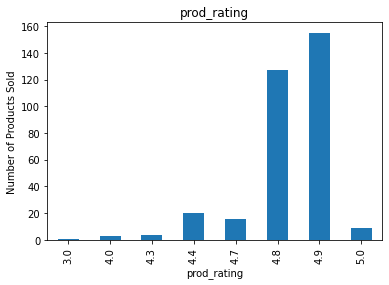

In [23]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['prod_no_sold'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Number of Products Sold")
    plt.title(feature)
    plt.show()

The graph above shows that product with rating of 4.9 has the highest median of number of products of sold, followed by number of products sold.

In [24]:
# Dealing with continuous feature

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['prod_price',
 'prod_no_rating',
 'prod_no_sold',
 'sell_rating',
 'sell_no_products',
 'sell_resprate',
 'sell_follower',
 'sell_joined']

In [25]:
df[continuous_features].head()

,prod_price,prod_no_rating,prod_no_sold,sell_rating,sell_no_products,sell_resprate,sell_follower,sell_joined
0,12.5,5.0,421,23000,411,0.98,9000,1080
1,15.9,4.9,68,2000,57,0.81,1000,360
2,63.5,0.0,0,2000,57,0.81,1000,360
3,13.8,4.9,788,25000,421,0.99,25000,1800
4,4.5,5.0,967,23000,411,0.98,9000,1080


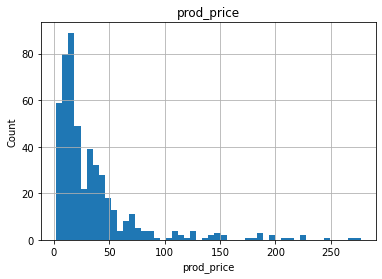

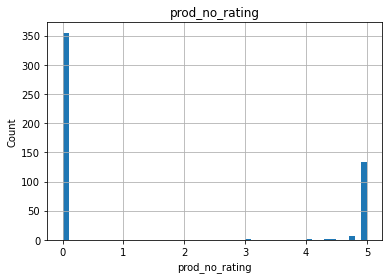

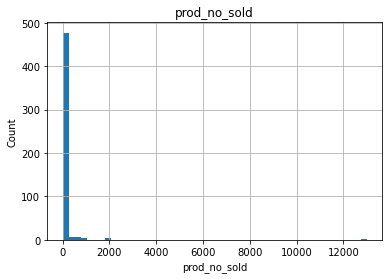

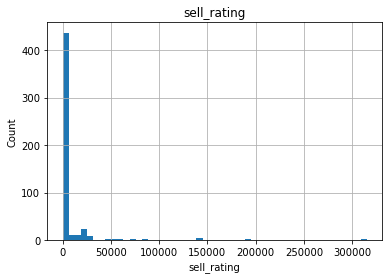

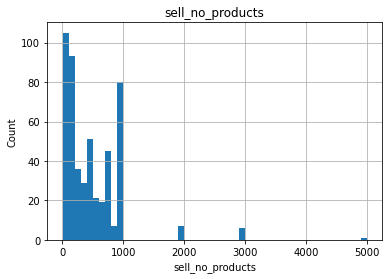

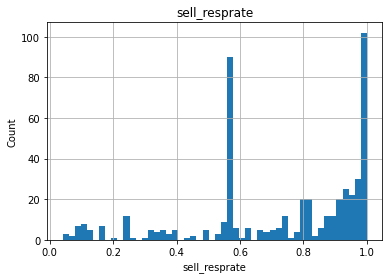

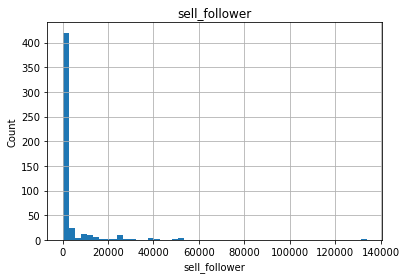

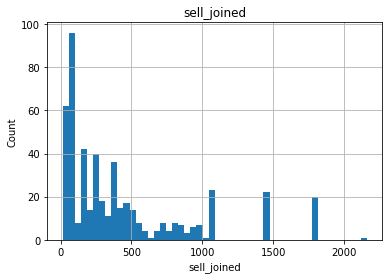

In [26]:
# Use histogram to understand the distribution of each variable
for feature in continuous_features:
    data = df.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\Han\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


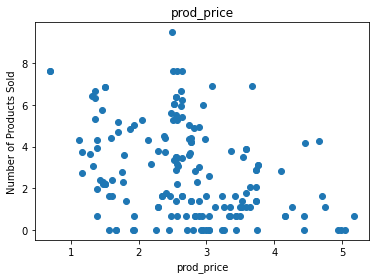

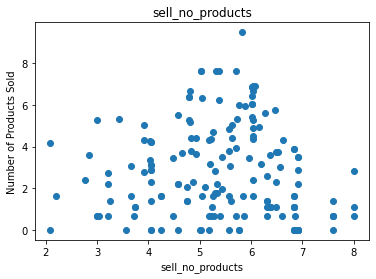

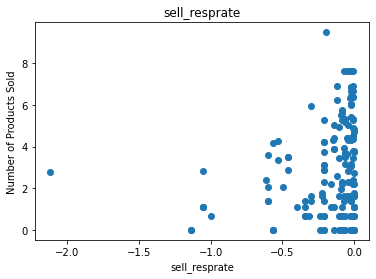

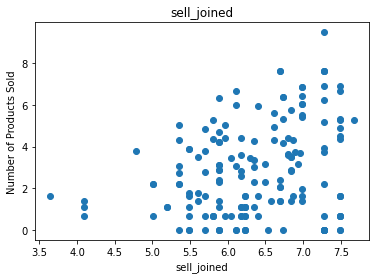

In [27]:
# Use Logarithmic transformation to make data more interpretable

for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['prod_no_sold']=np.log(data['prod_no_sold'])
        plt.scatter(data[feature],data['prod_no_sold'])
        plt.xlabel(feature)
        plt.ylabel('Number of Products Sold')
        plt.title(feature)
        plt.show()

prod_price
- As shown by the graph, there is no clear pattern between product price with number of products sold.

sell_no_products
- As shown by the graph, there is no clear pattern between number of products sold by sellers and the number of products sold

sell_resprate
- As shown by the graph, there is a clear grouping at sell_resprate = 0. This means that majority of the sellers have high response rate. It is also shown that the higher the seller response rate, the higher the number of products sold.

sell_joined
- As shown by the graph, there is a clear increase of number of products sold as the duration of seller joined increases. This can be inferred as the longer the sellers stay in the seller platform, the more likely that they will gain more credibility, hence it turns into product sales.

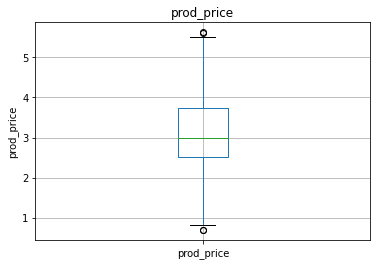

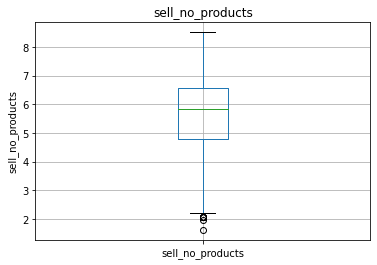

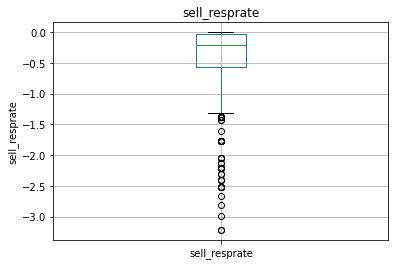

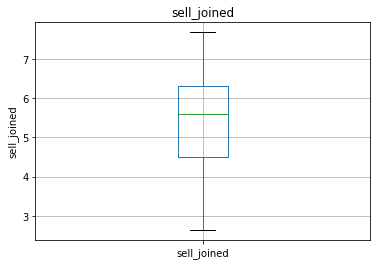

In [28]:
# Finding out outliers

for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [29]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['prod_name', 'prod_desc', 'sell_name', 'sell_resptime']

In [30]:
df[categorical_features].head()

,prod_name,prod_desc,sell_name,sell_resptime
0,Preferred+\n【Ready Stock 】 [Halal] NongShim Sh...,NaN,49shopp,within hours
1,Halal Nongshim Ramen (Shin Ramyun / Kimchi Ram...,Expiry date :\nShin ramyun - December 2021\nKi...,newlineresources.online,within hours
2,Halal Nongshim Shin Ramyun/Kimchi Ramen/ neogu...,"As part of the marketing strategies, Nongshim ...",newlineresources.online,within hours
3,Preferred+\nSHIN • KOREA KOREAN RAMEN POT ○ YE...,**Get Korean Spoon & Chopsticks at Only RM10 w...,imshin.,within hours
4,Preferred+\n【Ready Stock】 (HALAL) Korea Nongsh...,1. Nongshim Shin Ramyun Bowl (117g)\n- Octobe...,49shopp,within hours


In [31]:
# Find out the number of unique categories
for i in categorical_features:
    print(i, len(df[i].unique()))

prod_name 426
prod_desc 381
sell_name 300
sell_resptime 3


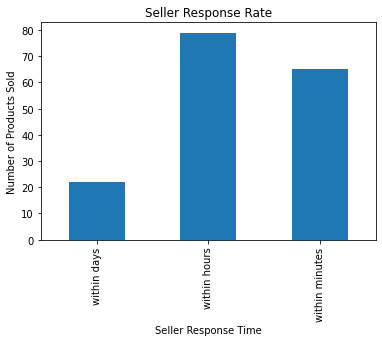

In [32]:
# Only sell_resprate is used because the others have way too many categories
data = df.copy()
data.groupby('sell_resptime')['prod_no_sold'].mean().plot.bar()
plt.xlabel('Seller Response Time')
plt.ylabel('Number of Products Sold')
plt.title('Seller Response Rate')
plt.show()

As shown by the graph, the faster the seller response, the more the products are getting sold.

In [33]:
# Find out the top 5 sellers
df.groupby('sell_name')['prod_no_sold'].sum().nlargest(5)

sell_name
vkmarket       13000
onlineku.os     4000
49shopp         3612
imshin.         2287
topstore.       2052
Name: prod_no_sold, dtype: int64

In [35]:
df.head()

,prod_name,prod_desc,prod_price,prod_rating,prod_no_rating,prod_no_sold,sell_name,sell_rating,sell_no_products,sell_resprate,sell_resptime,sell_follower,sell_joined
0,Preferred+\n【Ready Stock 】 [Halal] NongShim Sh...,NaN,12.5,5.0,5.0,421,49shopp,23000,411,0.98,within hours,9000,1080
1,Halal Nongshim Ramen (Shin Ramyun / Kimchi Ram...,Expiry date :\nShin ramyun - December 2021\nKi...,15.9,4.9,4.9,68,newlineresources.online,2000,57,0.81,within hours,1000,360
2,Halal Nongshim Shin Ramyun/Kimchi Ramen/ neogu...,"As part of the marketing strategies, Nongshim ...",63.5,NaN,0.0,0,newlineresources.online,2000,57,0.81,within hours,1000,360
3,Preferred+\nSHIN • KOREA KOREAN RAMEN POT ○ YE...,**Get Korean Spoon & Chopsticks at Only RM10 w...,13.8,4.9,4.9,788,imshin.,25000,421,0.99,within hours,25000,1800
4,Preferred+\n【Ready Stock】 (HALAL) Korea Nongsh...,1. Nongshim Shin Ramyun Bowl (117g)\n- Octobe...,4.5,5.0,5.0,967,49shopp,23000,411,0.98,within hours,9000,1080


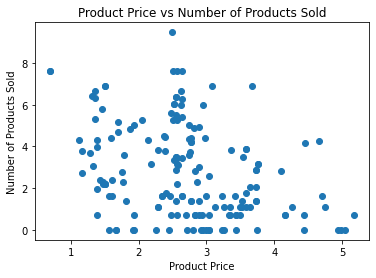

In [41]:
# Plotting price vs sales (seller perspective)

data = df.copy()

data['prod_price']=np.log(data['prod_price'])
data['prod_no_sold']=np.log(data['prod_no_sold'])

plt.scatter(data['prod_price'],data['prod_no_sold'])
plt.xlabel("Product Price")
plt.ylabel('Number of Products Sold')
plt.title("Product Price vs Number of Products Sold")
plt.show()

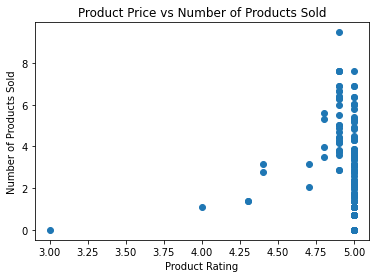

In [44]:
# Plotting ratings vs price (buyer perspective)

data = df.copy()
data['prod_no_sold']=np.log(data['prod_no_sold'])

plt.scatter(data['prod_rating'],data['prod_no_sold'])
plt.xlabel("Product Rating")
plt.ylabel('Number of Products Sold')
plt.title("Product Price vs Number of Products Sold")
plt.show()

## Summarize Insights

1. Product price does not affect number of products sold. Hence, making the product cheaper might not necessarily attracts people to buy. However, this does not take into consideration of different promotions set by respective sellers.

2. The longer the sellers are in the platform, the more the products are getting sold. Logically speaking, the more the product is showcased on the platform, that allows more exposure which in return people can buy over a longer duration.

3. The higher the product ratings, the higher the number of products sold. However, number of ratings should take into consideration as well.

4. The faster the seller response to their customers, the more likely the customer will buy the product. 

## Project Learnings

1. Quality of data collected is essential. In the future, number of ratings given to a product should be scraped properly because intuitively it is an important variable. 

1. If there is a certain variable(s) that enable a product to stand out, machine learning models can be applied to identify how well this product can do before launching into the market or to do sales prediction.

1. NLP can be applied to identify how the namings and description affect the number of products sold.

1. Now I know I should buy Shin Ramen from vkmarket :)